In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('financial_data.csv')

# 1. Display basic information about the dataset
print(df.info())

# 2. Display the first few rows of the dataset
print(df.head())

# 3. Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# 4. Set 'Date' column as index
df.set_index('Date', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Segment               700 non-null    object
 1   Country               700 non-null    object
 2   Product               700 non-null    object
 3   Discount_Band         700 non-null    object
 4   Units_Sold            700 non-null    int64 
 5   Manufacturing_Price   700 non-null    int64 
 6   Sale_Price            700 non-null    int64 
 7   Gross_Sales           700 non-null    int64 
 8   Discounts             700 non-null    int64 
 9   Sales                 700 non-null    int64 
 10  COGS                  700 non-null    int64 
 11  Profit                700 non-null    int64 
 12  Date                  700 non-null    object
 13  Month_Number          700 non-null    int64 
 14  Month_Name            700 non-null    object
 15  Year                  700 non-null    in

In [14]:
print(df.columns)


Index(['Segment', 'Country', 'Product ', 'Discount_Band ', 'Units_Sold ',
       'Manufacturing_Price ', 'Sale_Price ', 'Gross_Sales ', 'Discounts ',
       'Sales ', 'COGS ', 'Profit ', 'Month_Number', 'Month_Name ', 'Year'],
      dtype='object')


In [13]:
df.head()


,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Month_Number,Month_Name,Year
Date,,,,,,,,,,,,,,,
2014-01-01,Government,Canada,Carretera,None,1619,3,20,32370,0,32370,16185,16185,1,January,2014
2014-01-01,Government,Germany,Carretera,None,1321,3,20,26420,0,26420,13210,13210,1,January,2014
2014-01-06,Midmarket,France,Carretera,None,2178,3,15,32670,0,32670,21780,10890,6,June,2014
2014-01-06,Midmarket,Germany,Carretera,None,888,3,15,13320,0,13320,8880,4440,6,June,2014
2014-01-06,Midmarket,Mexico,Carretera,None,2470,3,15,37050,0,37050,24700,12350,6,June,2014


**TOTAL REVENUE OF 2024**

In [33]:
import plotly.graph_objects as go

def create_kpi_card(kpi_value, kpi_name, kpi_description):
    fig = go.Figure()

    fig.add_trace(go.Indicator(
        mode="number+delta",
        value=kpi_value,
        title={"text": kpi_name},
        domain={'x': [0, 1], 'y': [0.5, 1]},
        delta={'reference': kpi_value * 1.05},  # Example delta, adjust accordingly
        number={'prefix': '€', 'font_size': 48},
        title_font_size=24,
        delta_font_size=18
    ))

    fig.update_layout(
        title=kpi_description,
        title_font_size=14,
        paper_bgcolor='lightblue',
        margin=dict(l=50, r=50, t=50, b=50),
    )

    fig.show()

# Example KPI
create_kpi_card(kpi_value=3456789, kpi_name='Total Revenue', kpi_description='Total revenue for the year 2024')


**TOTAL REVENUE**

In [39]:
# Assuming df is your DataFrame
total_revenue = df['Sales'].sum()

fig = go.Figure()
fig.add_trace(go.Indicator(
    mode="number",
    value=total_revenue,
    title={"text": "Total Revenue"}
))
fig.show()


**TOTAL PROFIT**

In [40]:
total_profit = df['Profit'].sum()

fig = go.Figure()
fig.add_trace(go.Indicator(
    mode="number",
    value=total_profit,
    title={"text": "Total Profit"}
))
fig.show()


**GROSS PROFIT MARGIN**

In [52]:
import plotly.graph_objects as go

# Calculate Gross Profit Margin
gross_profit_margin = (df['Profit'].sum() / df['Sales'].sum()) * 100

fig = go.Figure()
fig.add_trace(go.Indicator(
    mode="number",  # Use 'number' to display the value as a percentage
    value=gross_profit_margin,
    title={"text": "Gross Profit Margin"},
    number={'suffix': '%'}  # Add '%' sign to the displayed number
))
fig.show()


**AVERAGE DISCOUNT**

In [43]:
average_discount = df['Discounts'].mean()

fig = go.Figure()
fig.add_trace(go.Indicator(
    mode="number",
    value=average_discount,
    title={"text": "Average Discount"}
))
fig.show()


**TOTAL UNITS SOLD**

In [44]:
total_units_sold = df['Units_Sold'].sum()

fig = go.Figure()
fig.add_trace(go.Indicator(
    mode="number",
    value=total_units_sold,
    title={"text": "Total Units Sold"}
))
fig.show()


**REVENUE GROWTH RATE**

In [51]:
import plotly.graph_objects as go

# Example data
revenue_growth_rate = 10.5  # Example value

fig = go.Figure()
fig.add_trace(go.Indicator(
    mode="number+delta",
    value=revenue_growth_rate,
    title={"text": "Revenue Growth Rate"}
))
fig.show()


**PROFIT BY SEGMENT**

In [56]:
import plotly.graph_objects as go

# Calculate Profit by Segment
profit_by_segment = df.groupby('Segment')['Profit'].sum()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=profit_by_segment.index,
    y=profit_by_segment.values
))

# Update the layout to include a title
fig.update_layout(
    title="Profit by Segment"
)

fig.show()


**AVERAGE SALE PRICE**

In [47]:
average_sale_price = df['Sale_Price'].mean()

fig = go.Figure()
fig.add_trace(go.Indicator(
    mode="number",
    value=average_sale_price,
    title={"text": "Average Sale Price"}
))
fig.show()


**SALES PERFORMANCE BY PRODUCT**

In [57]:
import plotly.graph_objects as go

# Group by 'Product' and sum 'Sales'
sales_by_product = df.groupby('Product')['Sales'].sum()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=sales_by_product.index,
    y=sales_by_product.values
))

# Set the title for the figure
fig.update_layout(
    title={"text": "Sales Performance by Product"}
)

fig.show()


**REVENUE AND PROFIT ANALYSIS**

C:\Users\User\AppData\Local\Temp\ipykernel_126992\4166958129.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.resample('M').agg({'Sales': 'sum'})


               Sales
Date                
2013-01-31  26415268
2013-02-28         0
2013-03-31         0
2013-04-30         0
2013-05-31         0


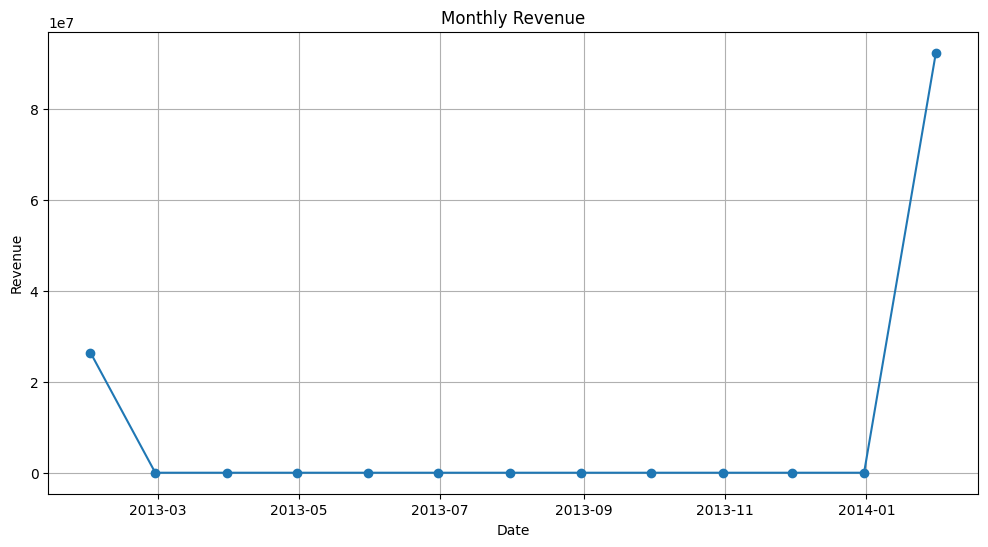

C:\Users\User\AppData\Local\Temp\ipykernel_126992\4166958129.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_revenue = df.resample('Y').agg({'Sales': 'sum'})


               Sales
Date                
2013-12-31  26415268
2014-12-31  92311117


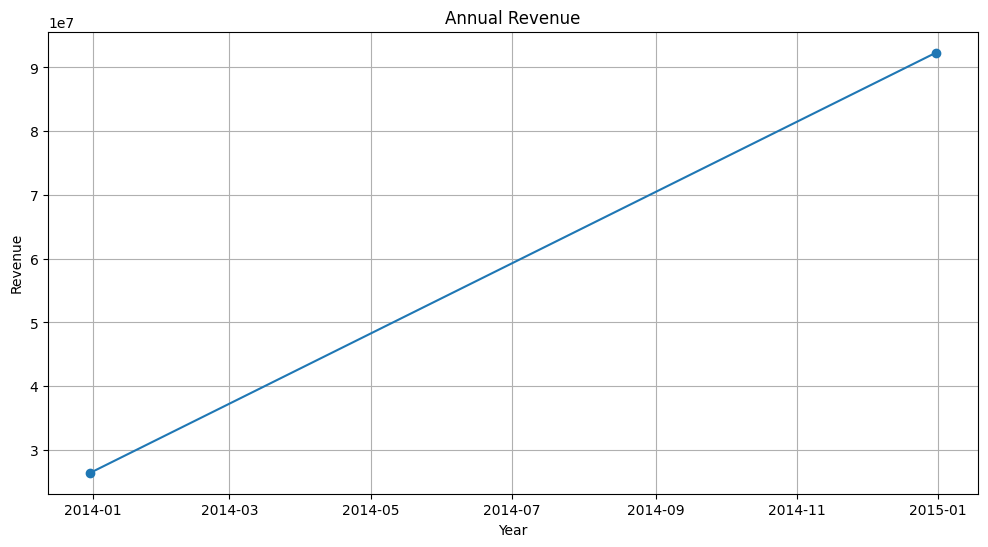

Total Profit: 16893724
            Profit_Margin
Date                     
2014-01-01       0.500000
2014-01-01       0.500000
2014-01-06       0.333333
2014-01-06       0.333333
2014-01-06       0.333333


In [22]:
# 5. Calculate monthly revenue
monthly_revenue = df.resample('M').agg({'Sales': 'sum'})
print(monthly_revenue.head())

# 6. Plot monthly revenue
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue['Sales'], marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# 7. Calculate annual revenue
annual_revenue = df.resample('Y').agg({'Sales': 'sum'})
print(annual_revenue.head())

# 8. Plot annual revenue
plt.figure(figsize=(12, 6))
plt.plot(annual_revenue.index, annual_revenue['Sales'], marker='o')
plt.title('Annual Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# 9. Calculate total profit
total_profit = df['Profit'].sum()
print(f'Total Profit: {total_profit}')

# 10. Calculate profit margin
df['Profit_Margin'] = df['Profit'] / df['Sales']
print(df[['Profit_Margin']].head())


In [17]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Verify the updated column names
print(df.columns)


Index(['Segment', 'Country', 'Product', 'Discount_Band', 'Units_Sold',
       'Manufacturing_Price', 'Sale_Price', 'Gross_Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Month_Number', 'Month_Name', 'Year'],
      dtype='object')


**FINANCIAL METRICS**

C:\Users\User\AppData\Local\Temp\ipykernel_126992\2478739564.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit_margin = df.resample('M').agg({'Profit_Margin': 'mean'})


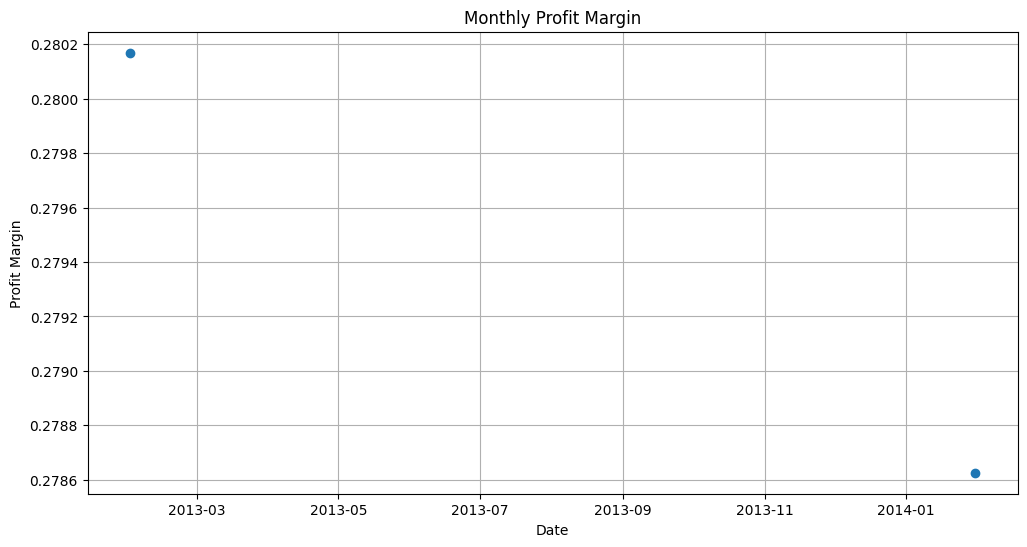

                  Gross_Sales
Segment                      
Channel Partners      1935162
Enterprise           21069003
Government           56403068
Midmarket             2582672
Small Business       45941700


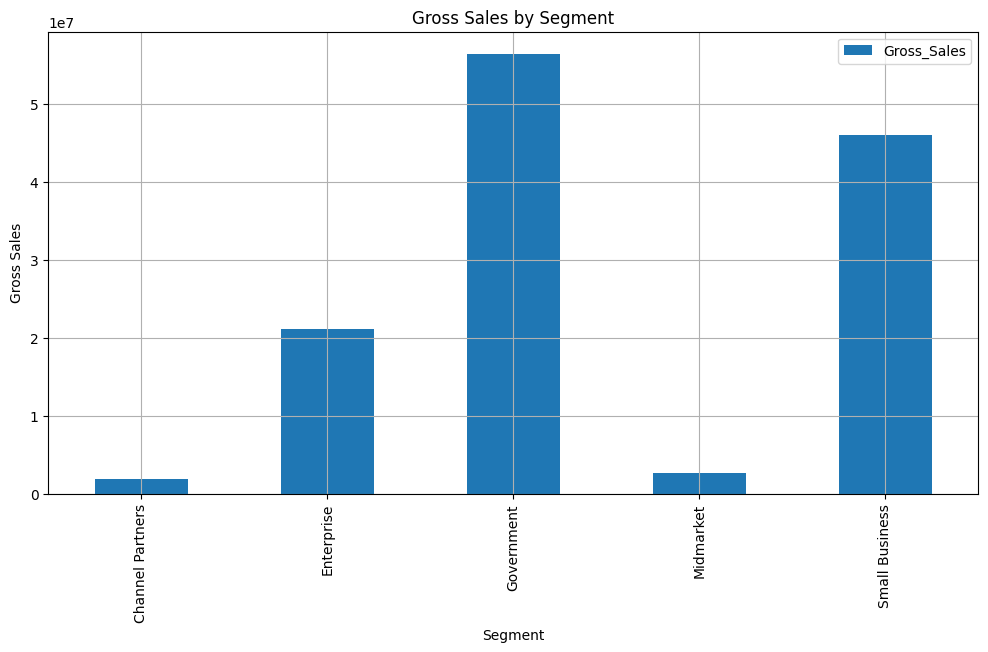

            Units_Sold
Product               
Amarilla        155318
Carretera       146849
Montana         154201
Paseo           338243
VTT             168787
Velo            162426


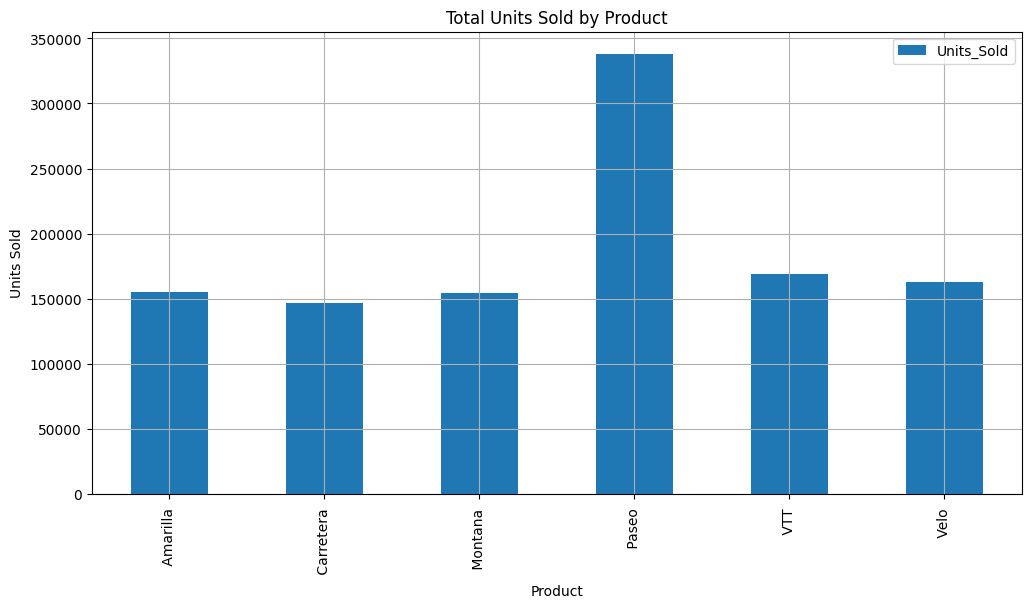

                           Profit
Country                          
Canada                    3529232
France                    3781029
Germany                   3680398
Mexico                    2907523
United States of America  2995542


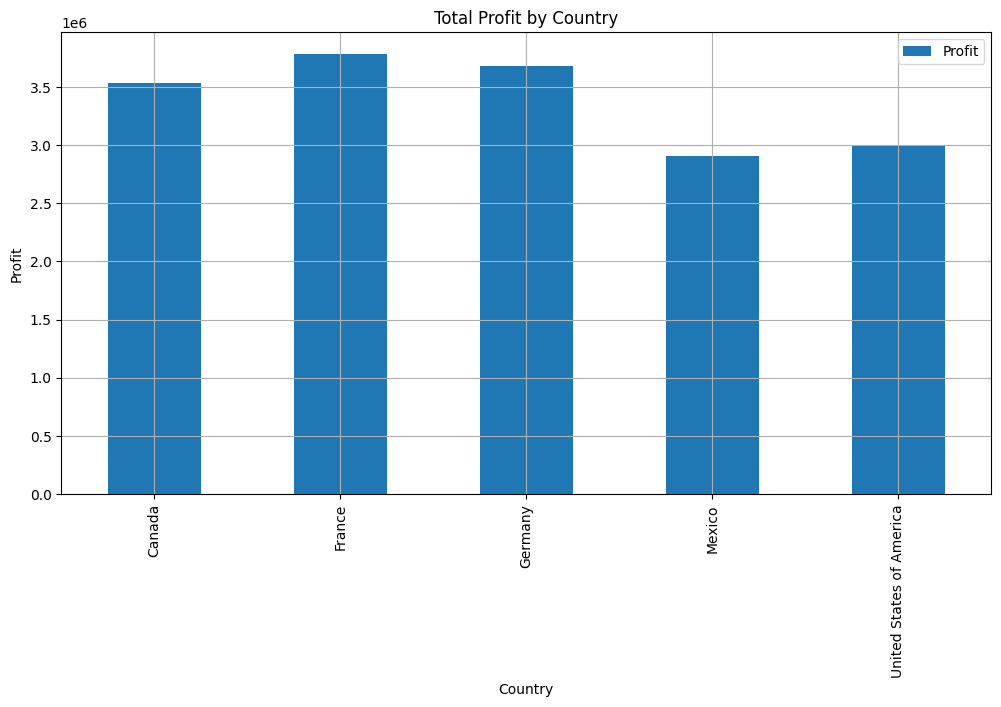

                 ROA
Date                
2014-01-01  0.000127
2014-01-01  0.000103
2014-01-06  0.000085
2014-01-06  0.000035
2014-01-06  0.000097


In [23]:
# 11. Plot profit margin by month
monthly_profit_margin = df.resample('M').agg({'Profit_Margin': 'mean'})
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit_margin.index, monthly_profit_margin['Profit_Margin'], marker='o')
plt.title('Monthly Profit Margin')
plt.xlabel('Date')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.show()

# 12. Calculate and plot gross sales by segment
gross_sales_by_segment = df.groupby('Segment').agg({'Gross_Sales': 'sum'})
print(gross_sales_by_segment)
gross_sales_by_segment.plot(kind='bar', figsize=(12, 6))
plt.title('Gross Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Gross Sales')
plt.grid(True)
plt.show()

# 13. Calculate and plot total units sold by product
units_sold_by_product = df.groupby('Product').agg({'Units_Sold': 'sum'})
print(units_sold_by_product)
units_sold_by_product.plot(kind='bar', figsize=(12, 6))
plt.title('Total Units Sold by Product')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

# 14. Calculate and plot total profit by country
profit_by_country = df.groupby('Country').agg({'Profit': 'sum'})
print(profit_by_country)
profit_by_country.plot(kind='bar', figsize=(12, 6))
plt.title('Total Profit by Country')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# 15. Calculate return on assets (ROA)
total_assets = df['Gross_Sales'].sum()  # Assuming gross sales as a proxy for assets
df['ROA'] = df['Profit'] / total_assets
print(df[['ROA']].head())


**DISCOUNT AND COST ANALYSIS**

C:\Users\User\AppData\Local\Temp\ipykernel_126992\320770466.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_roa = df.resample('M').agg({'ROA': 'mean'})


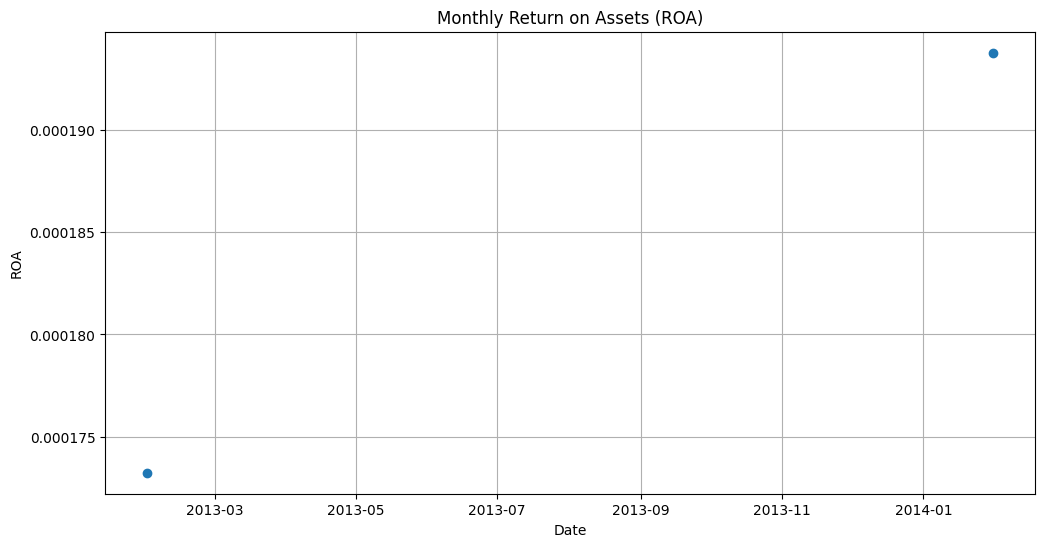

            Discount_Percentage
Date                           
2014-01-01                  0.0
2014-01-01                  0.0
2014-01-06                  0.0
2014-01-06                  0.0
2014-01-06                  0.0


C:\Users\User\AppData\Local\Temp\ipykernel_126992\320770466.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_discount_percentage = df.resample('M').agg({'Discount_Percentage': 'mean'})


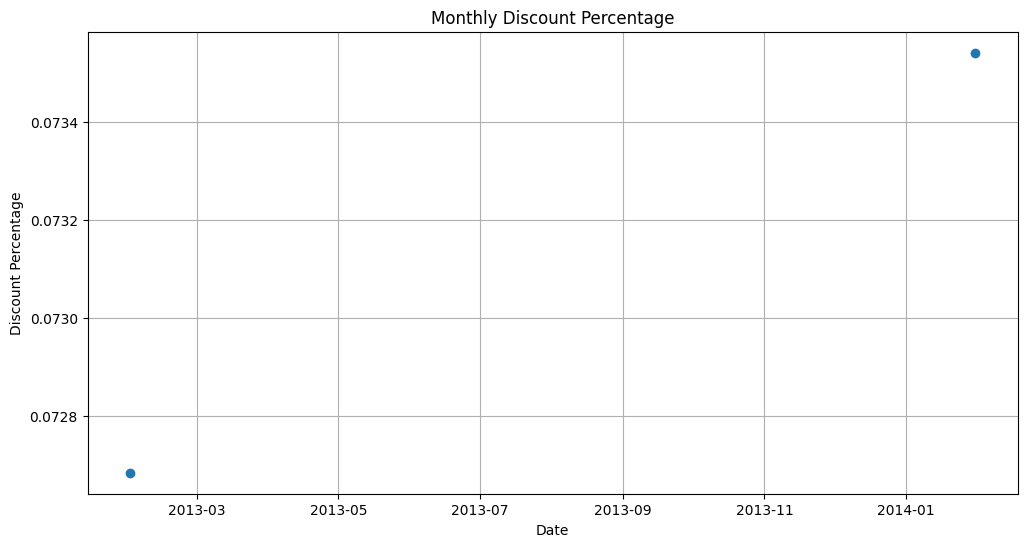

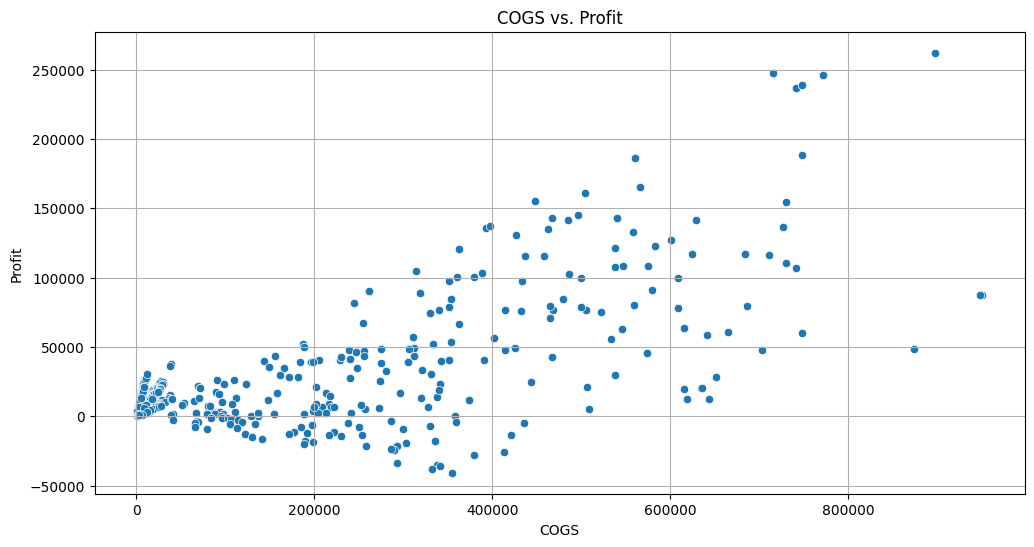

            Average_Selling_Price
Date                             
2014-01-01              19.993823
2014-01-01              20.000000
2014-01-06              15.000000
2014-01-06              15.000000
2014-01-06              15.000000


C:\Users\User\AppData\Local\Temp\ipykernel_126992\320770466.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_selling_price = df.resample('M').agg({'Average_Selling_Price': 'mean'})


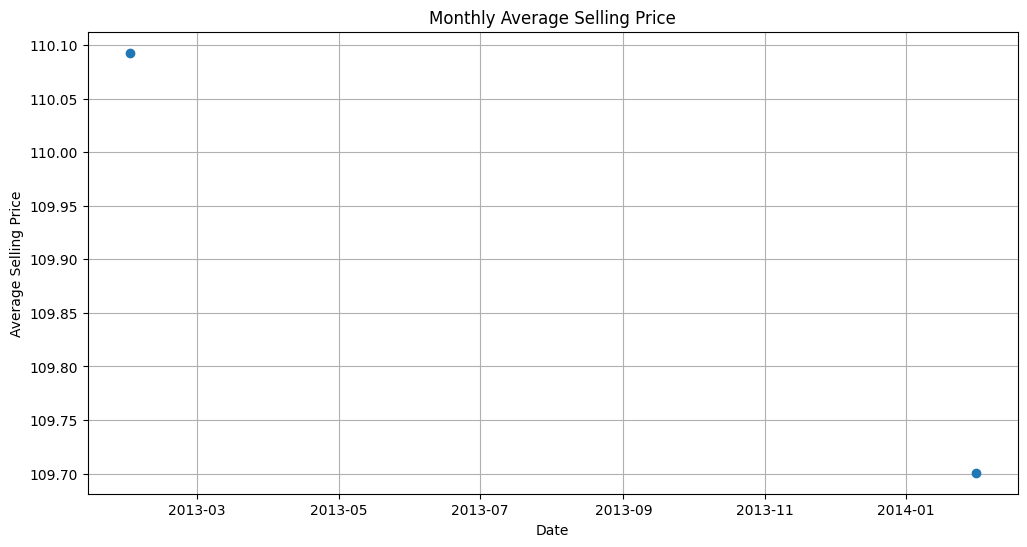

In [24]:
# 16. Plot ROA by month
monthly_roa = df.resample('M').agg({'ROA': 'mean'})
plt.figure(figsize=(12, 6))
plt.plot(monthly_roa.index, monthly_roa['ROA'], marker='o')
plt.title('Monthly Return on Assets (ROA)')
plt.xlabel('Date')
plt.ylabel('ROA')
plt.grid(True)
plt.show()

# 17. Calculate and plot discount percentage
df['Discount_Percentage'] = df['Discounts'] / df['Gross_Sales']
print(df[['Discount_Percentage']].head())
monthly_discount_percentage = df.resample('M').agg({'Discount_Percentage': 'mean'})
plt.figure(figsize=(12, 6))
plt.plot(monthly_discount_percentage.index, monthly_discount_percentage['Discount_Percentage'], marker='o')
plt.title('Monthly Discount Percentage')
plt.xlabel('Date')
plt.ylabel('Discount Percentage')
plt.grid(True)
plt.show()

# 18. Calculate and plot COGS vs. Profit
plt.figure(figsize=(12, 6))
sns.scatterplot(x='COGS', y='Profit', data=df)
plt.title('COGS vs. Profit')
plt.xlabel('COGS')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# 19. Calculate average selling price
df['Average_Selling_Price'] = df['Sales'] / df['Units_Sold']
print(df[['Average_Selling_Price']].head())

# 20. Plot average selling price by month
monthly_avg_selling_price = df.resample('M').agg({'Average_Selling_Price': 'mean'})
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_selling_price.index, monthly_avg_selling_price['Average_Selling_Price'], marker='o')
plt.title('Monthly Average Selling Price')
plt.xlabel('Date')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()


**BUDGET AND PERFORMANCE ANALYSIS**

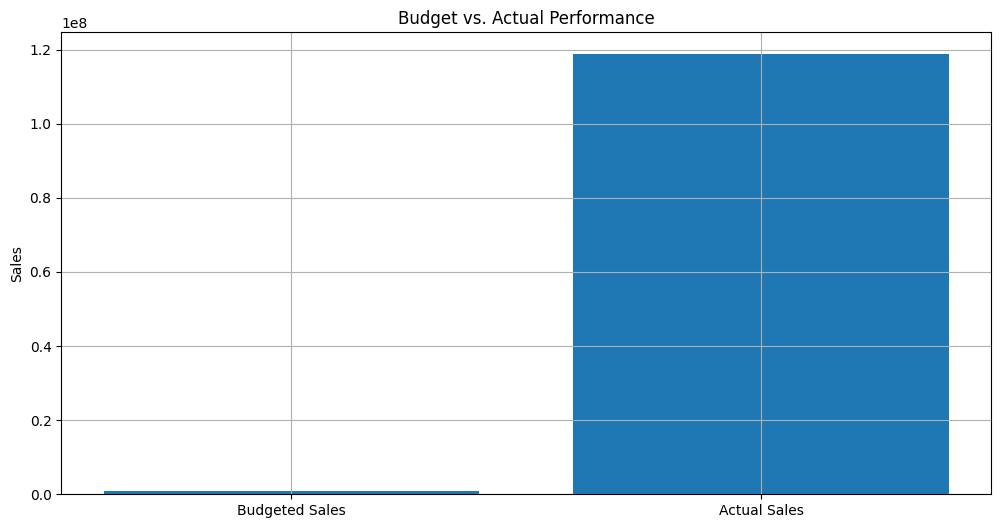

Total Discount Amount: 9205268
Total COGS: 101832652


C:\Users\User\AppData\Local\Temp\ipykernel_126992\4252272188.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_units_sold = df.resample('M').agg({'Units_Sold': 'sum'})


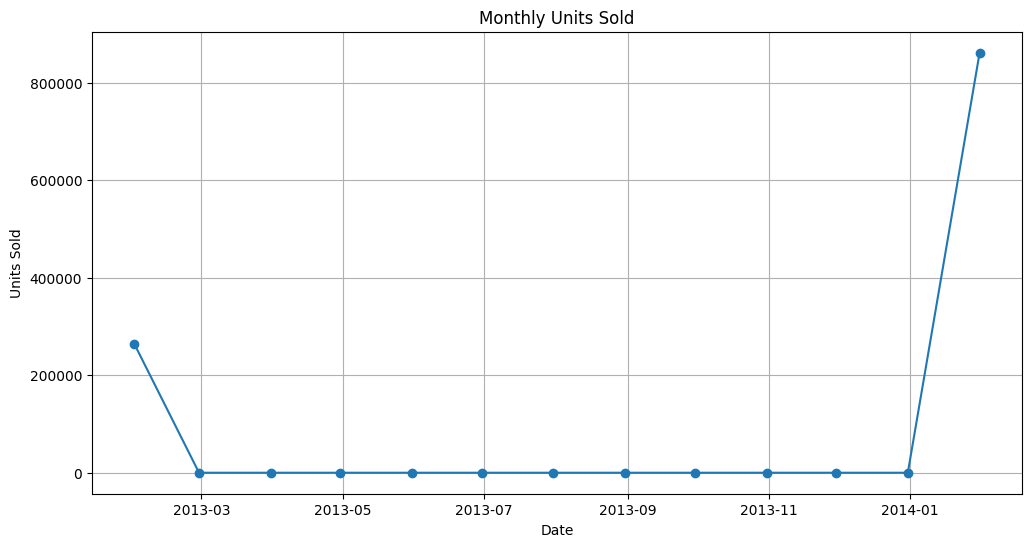

                  Discount_Percentage
Segment                              
Channel Partners             0.070798
Enterprise                   0.066001
Government                   0.075129
Midmarket                    0.075705
Small Business               0.075400


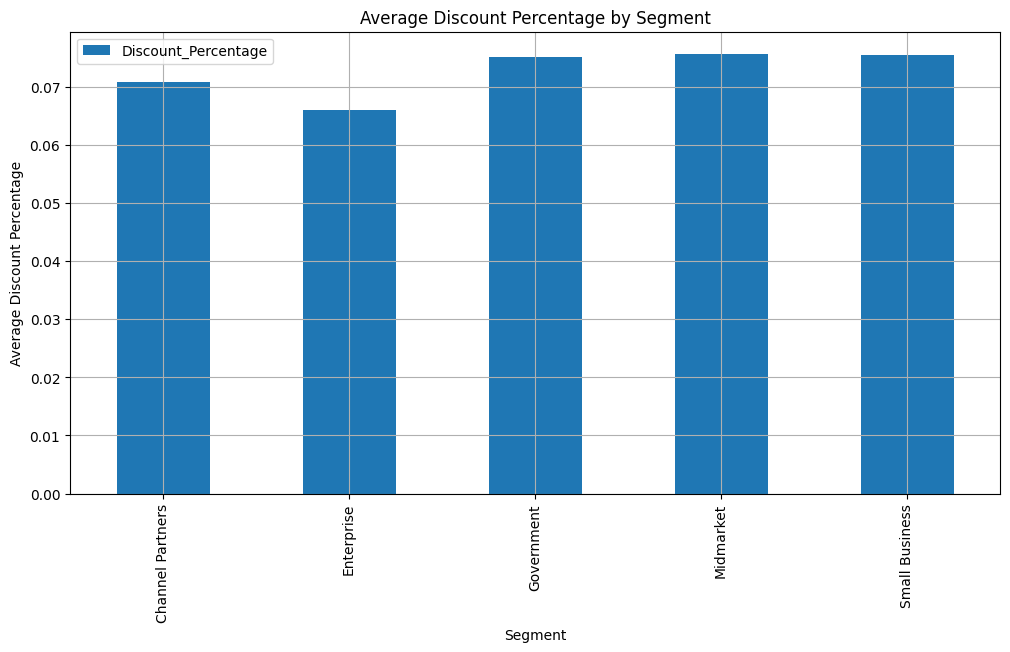

In [25]:
# 21. Calculate and plot budget vs. actual performance
budgeted_sales = 1000000  # Example budget
actual_sales = df['Sales'].sum()
plt.figure(figsize=(12, 6))
plt.bar(['Budgeted Sales', 'Actual Sales'], [budgeted_sales, actual_sales])
plt.title('Budget vs. Actual Performance')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# 22. Calculate and plot total discount amount
total_discount_amount = df['Discounts'].sum()
print(f'Total Discount Amount: {total_discount_amount}')

# 23. Calculate and plot total cost of goods sold (COGS)
total_cogs = df['COGS'].sum()
print(f'Total COGS: {total_cogs}')

# 24. Calculate and plot total units sold by month
monthly_units_sold = df.resample('M').agg({'Units_Sold': 'sum'})
plt.figure(figsize=(12, 6))
plt.plot(monthly_units_sold.index, monthly_units_sold['Units_Sold'], marker='o')
plt.title('Monthly Units Sold')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

# 25. Calculate and plot average discount percentage by segment
avg_discount_by_segment = df.groupby('Segment').agg({'Discount_Percentage': 'mean'})
print(avg_discount_by_segment)
avg_discount_by_segment.plot(kind='bar', figsize=(12, 6))
plt.title('Average Discount Percentage by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Discount Percentage')
plt.grid(True)
plt.show()


**SEGMENT AND COUNTRY ANALYSIS**

                                Profit
Country                               
Canada                    25208.800000
France                    27007.350000
Germany                   26288.557143
Mexico                    20768.021429
United States of America  21396.728571


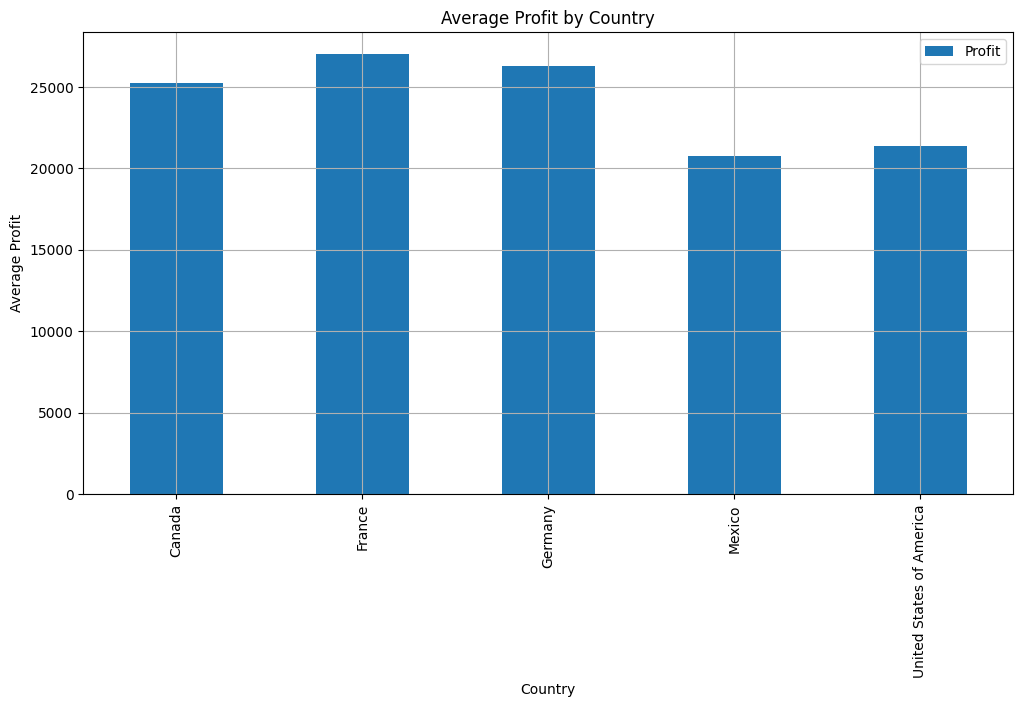

               Sales   Profit
Product                      
Amarilla    17747118  2814105
Carretera   13815313  1826806
Montana     15390807  2114760
Paseo       33011153  4797448
VTT         20511928  3034610
Velo        18250066  2305995


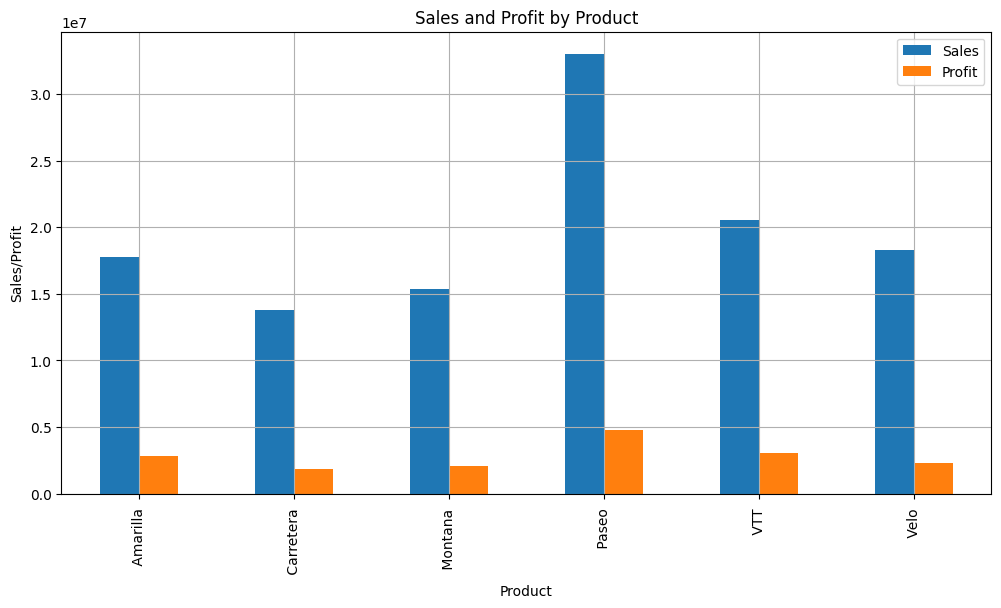

                  Profit_Margin
Segment                        
Channel Partners       0.730232
Enterprise            -0.030563
Government             0.293319
Midmarket              0.276745
Small Business         0.096710


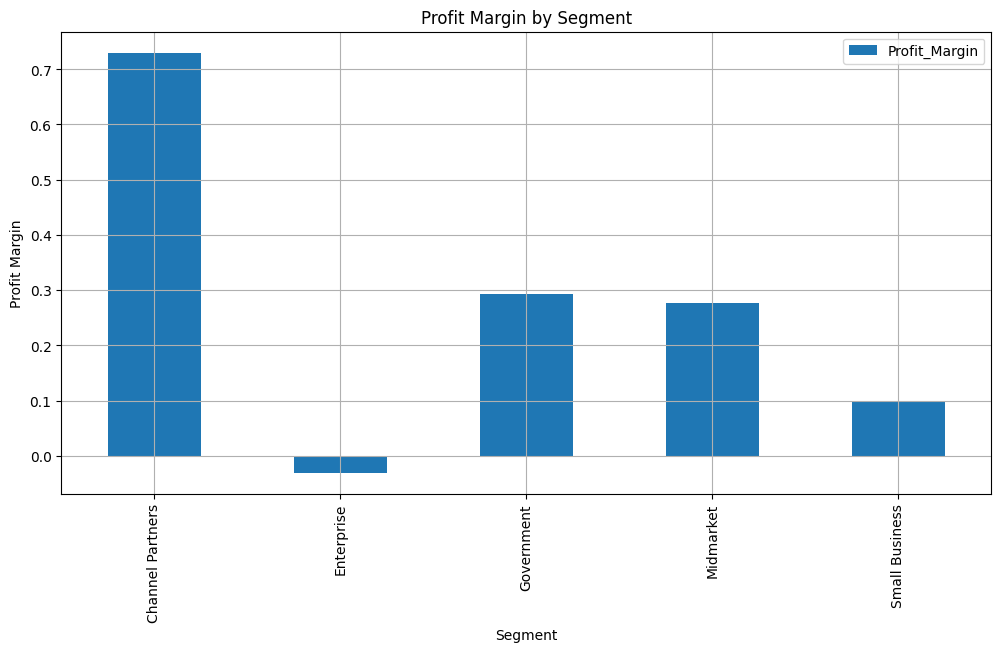

                          Gross_Sales
Country                              
Canada                       26932165
France                       26081677
Germany                      24921468
Mexico                       22726935
United States of America     27269360


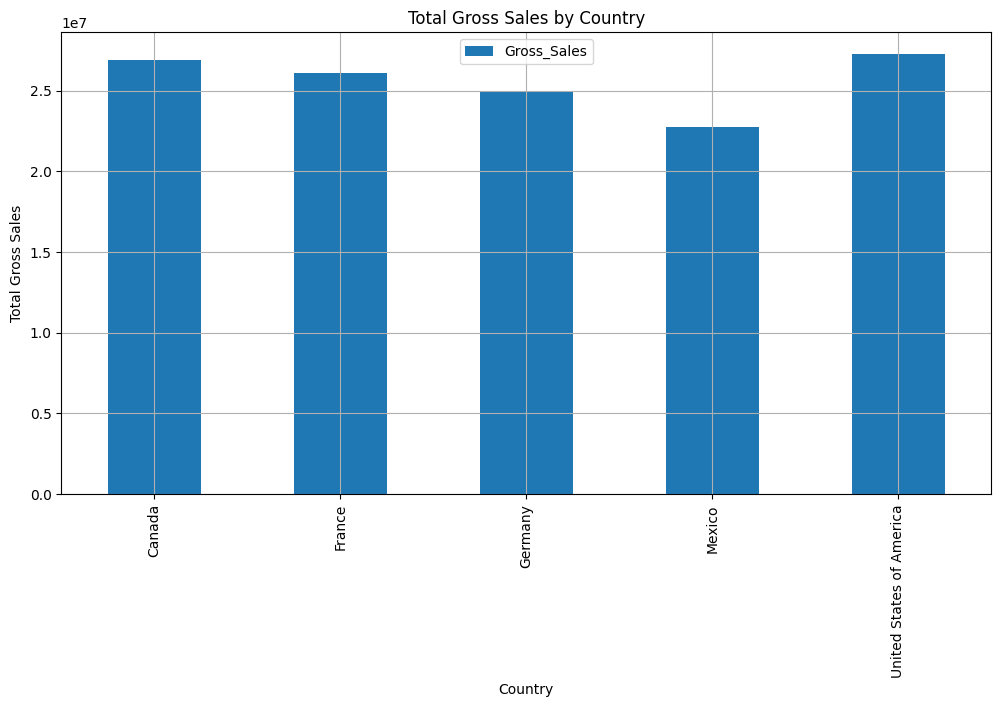

               Sale_Price
Discount_Band            
High           115.579592
Low            133.912500
Medium         116.776860
None            92.396226


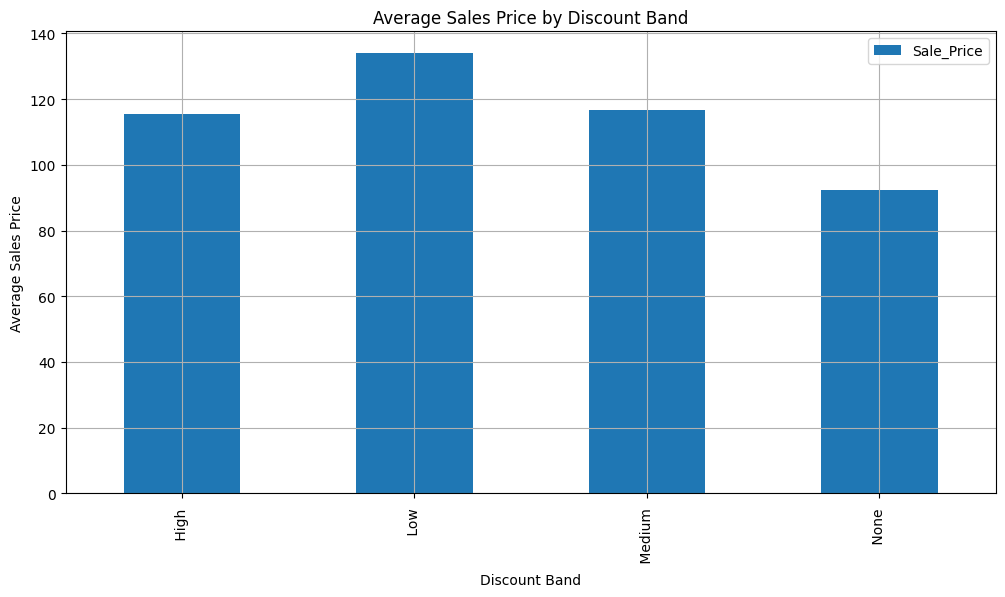

In [26]:
# 26. Calculate and plot average profit by country
avg_profit_by_country = df.groupby('Country').agg({'Profit': 'mean'})
print(avg_profit_by_country)
avg_profit_by_country.plot(kind='bar', figsize=(12, 6))
plt.title('Average Profit by Country')
plt.xlabel('Country')
plt.ylabel('Average Profit')
plt.grid(True)
plt.show()

# 27. Calculate and plot sales and profit by product
sales_profit_by_product = df.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum'})
print(sales_profit_by_product)
sales_profit_by_product.plot(kind='bar', figsize=(12, 6))
plt.title('Sales and Profit by Product')
plt.xlabel('Product')
plt.ylabel('Sales/Profit')
plt.grid(True)
plt.show()

# 28. Calculate and plot profit margin by segment
profit_margin_by_segment = df.groupby('Segment').agg({'Profit_Margin': 'mean'})
print(profit_margin_by_segment)
profit_margin_by_segment.plot(kind='bar', figsize=(12, 6))
plt.title('Profit Margin by Segment')
plt.xlabel('Segment')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.show()

# 29. Calculate and plot total gross sales by country
total_gross_sales_by_country = df.groupby('Country').agg({'Gross_Sales': 'sum'})
print(total_gross_sales_by_country)
total_gross_sales_by_country.plot(kind='bar', figsize=(12, 6))
plt.title('Total Gross Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Gross Sales')
plt.grid(True)
plt.show()

# 30. Calculate and plot average sales price by discount band
avg_sales_price_by_discount_band = df.groupby('Discount_Band').agg({'Sale_Price': 'mean'})
print(avg_sales_price_by_discount_band)
avg_sales_price_by_discount_band.plot(kind='bar', figsize=(12, 6))
plt.title('Average Sales Price by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Average Sales Price')
plt.grid(True)
plt.show()


**MONTHLY AND YEARLY ANALYSIS**

C:\Users\User\AppData\Local\Temp\ipykernel_126992\2481878854.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit = df.resample('M').agg({'Profit': 'sum'})


              Profit
Date                
2013-01-31   3878471
2013-02-28         0
2013-03-31         0
2013-04-30         0
2013-05-31         0
2013-06-30         0
2013-07-31         0
2013-08-31         0
2013-09-30         0
2013-10-31         0
2013-11-30         0
2013-12-31         0
2014-01-31  13015253


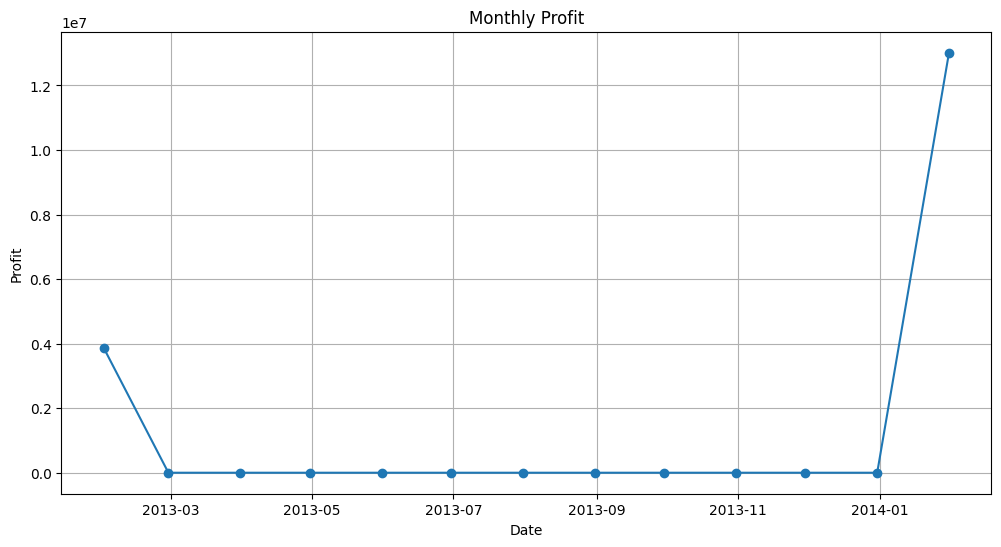

                     Sales
Segment                   
Channel Partners   1800594
Enterprise        19611705
Government        52504283
Midmarket          2381883
Small Business    42427920


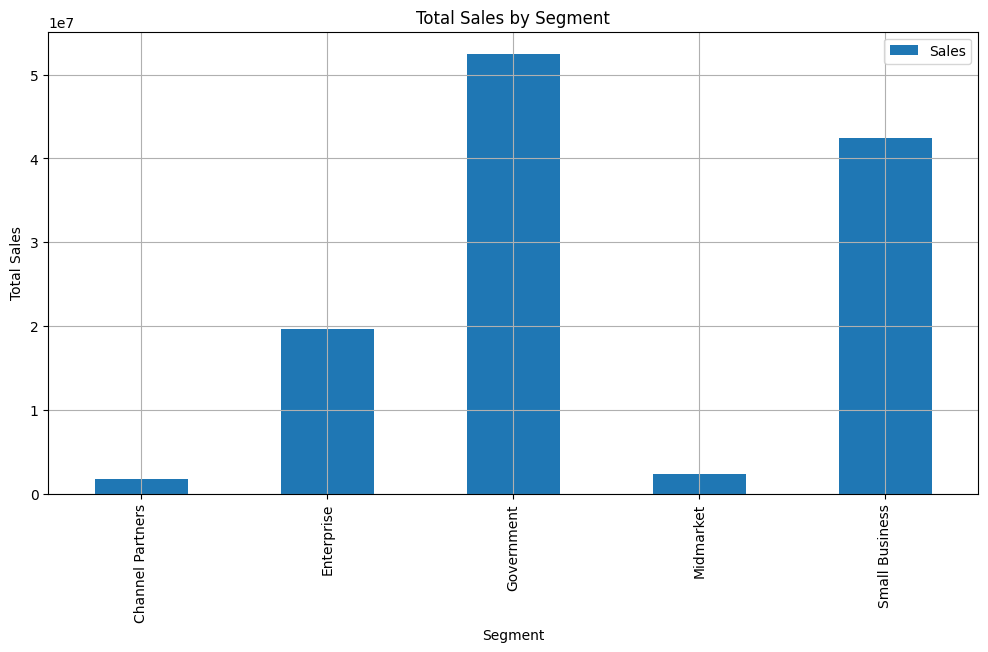

               Units_Sold
Discount_Band            
High               398092
Low                261863
Medium             379704
None                86165


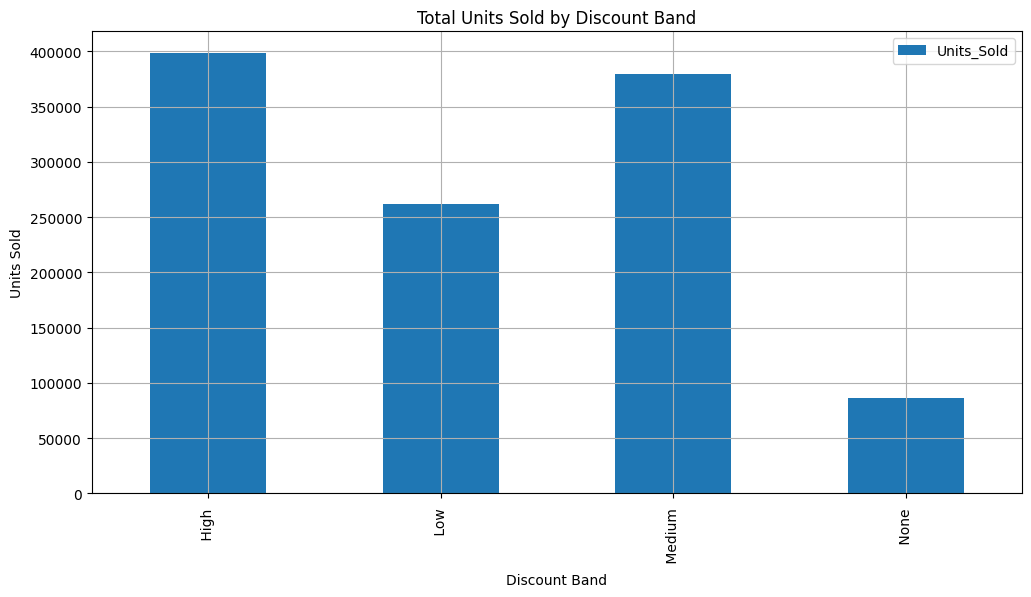

             Profit
Product            
Amarilla    2814105
Carretera   1826806
Montana     2114760
Paseo       4797448
VTT         3034610
Velo        2305995


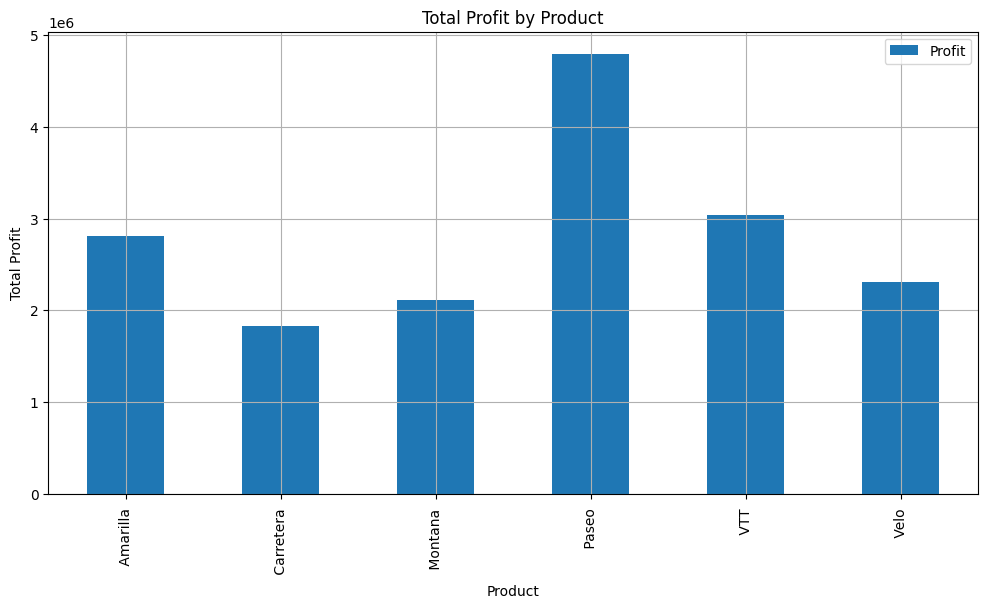

            Profit_Margin
Product                  
Amarilla         0.289926
Carretera        0.295236
Montana          0.272098
Paseo            0.285507
VTT              0.263770
Velo             0.264859


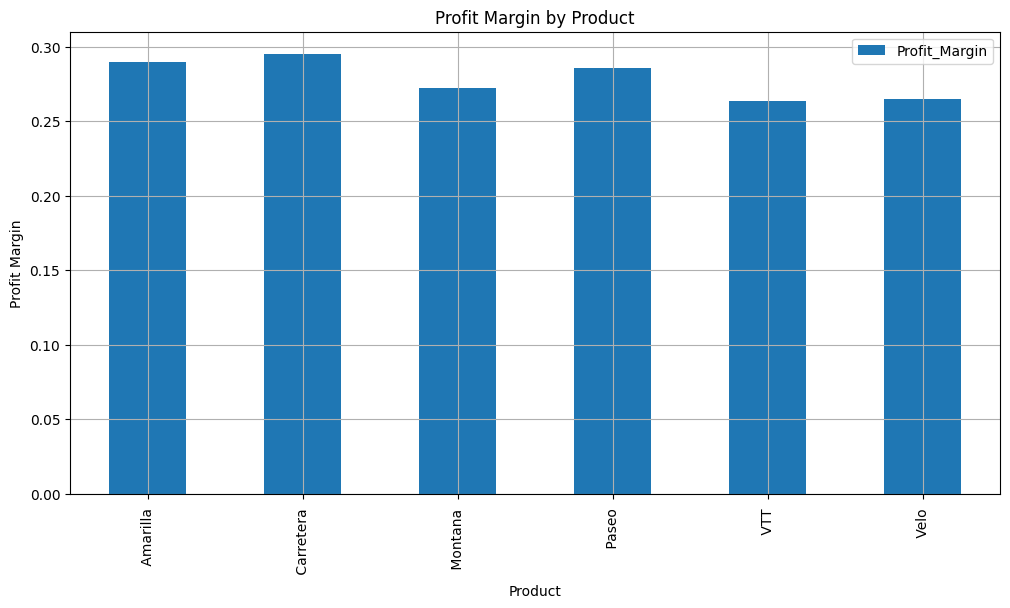

In [28]:
# 31. Calculate and plot profit by month
monthly_profit = df.resample('M').agg({'Profit': 'sum'})
print(monthly_profit)
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit.index, monthly_profit['Profit'], marker='o')
plt.title('Monthly Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# 32. Calculate and plot total sales by segment
total_sales_by_segment = df.groupby('Segment').agg({'Sales': 'sum'})
print(total_sales_by_segment)
total_sales_by_segment.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# 33. Calculate and plot total units sold by discount band
units_sold_by_discount_band = df.groupby('Discount_Band').agg({'Units_Sold': 'sum'})
print(units_sold_by_discount_band)
units_sold_by_discount_band.plot(kind='bar', figsize=(12, 6))
plt.title('Total Units Sold by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

# 34. Calculate and plot total profit by product
total_profit_by_product = df.groupby('Product').agg({'Profit': 'sum'})
print(total_profit_by_product)
total_profit_by_product.plot(kind='bar', figsize=(12, 6))
plt.title('Total Profit by Product')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

# 35. Calculate and plot profit margin by product
profit_margin_by_product = df.groupby('Product').agg({'Profit_Margin': 'mean'})
print(profit_margin_by_product)
profit_margin_by_product.plot(kind='bar', figsize=(12, 6))
plt.title('Profit Margin by Product')
plt.xlabel('Product')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.show()


**CATEGORY ANALYSIS**

                            Gross_Sales
Country                                
Canada                    192372.607143
France                    186297.692857
Germany                   178010.485714
Mexico                    162335.250000
United States of America  194781.142857


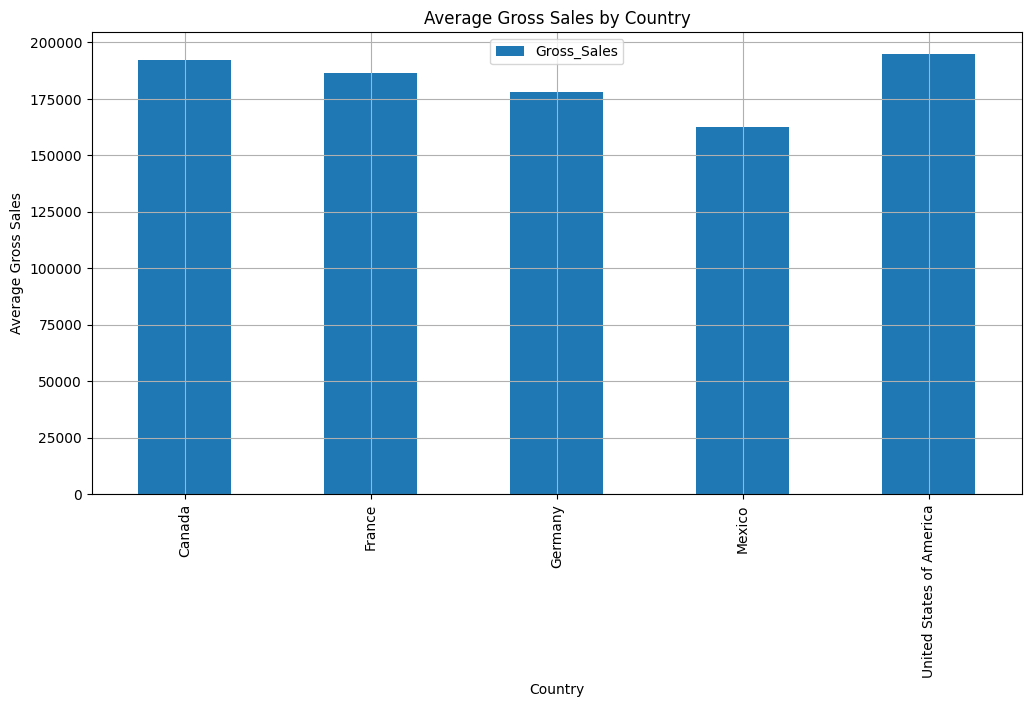

            Profit_Margin
Product                  
Amarilla         0.289926
Carretera        0.295236
Montana          0.272098
Paseo            0.285507
VTT              0.263770
Velo             0.264859


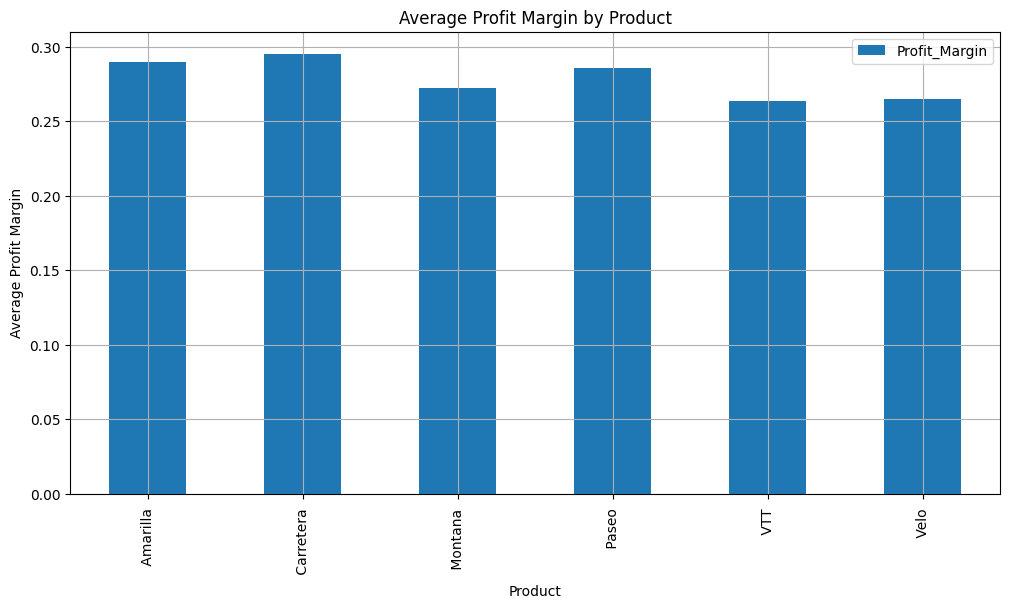

              Sales                                                    
Country      Canada   France  Germany   Mexico United States of America
Product                                                                
Amarilla    3855765  4016428  3960251  3077556                  2837118
Carretera   2610204  3423323  3062342  2879602                  1839842
Montana     2711921  3527385  3566046  1941329                  3644126
Paseo       7611523  5597755  5229817  7627733                  6944325
VTT         4768756  3811194  3293986  3172399                  5465593
Velo        3329491  3978097  4392910  2250738                  4298830


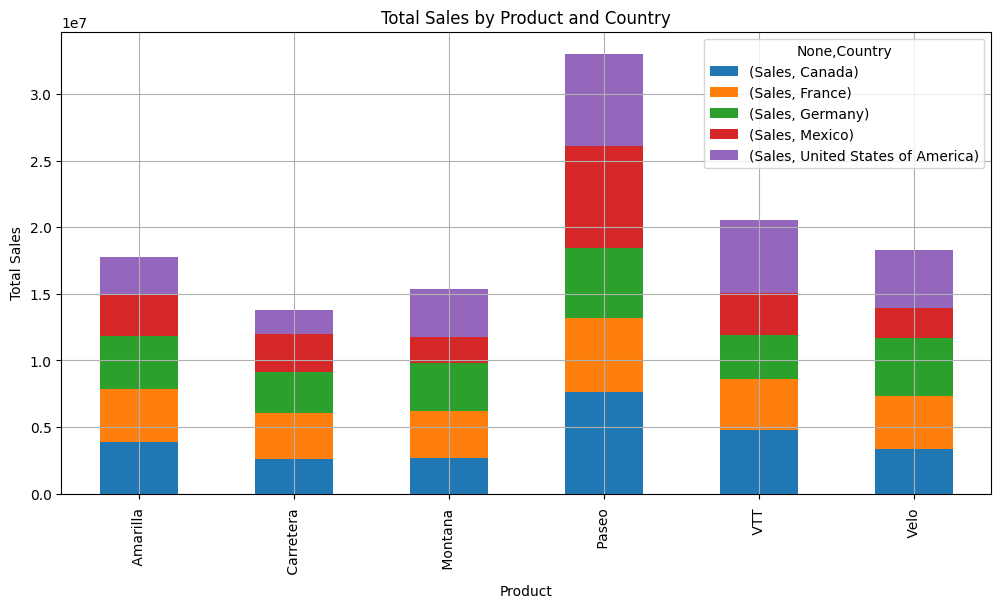

                    Profit                                               
Product          Amarilla  Carretera  Montana    Paseo      VTT     Velo 
Segment                                                                  
Channel Partners    230068     208405   192457   331840   219765   134268
Enterprise          -95154    -222714   -31095   -81738   -99084   -84764
Government         2208304    1398998  1126205  3057297  1840658  1756735
Midmarket            63606      94105    83879   258739    91121    68653
Small Business      407281     348012   743314  1231310   982150   431103


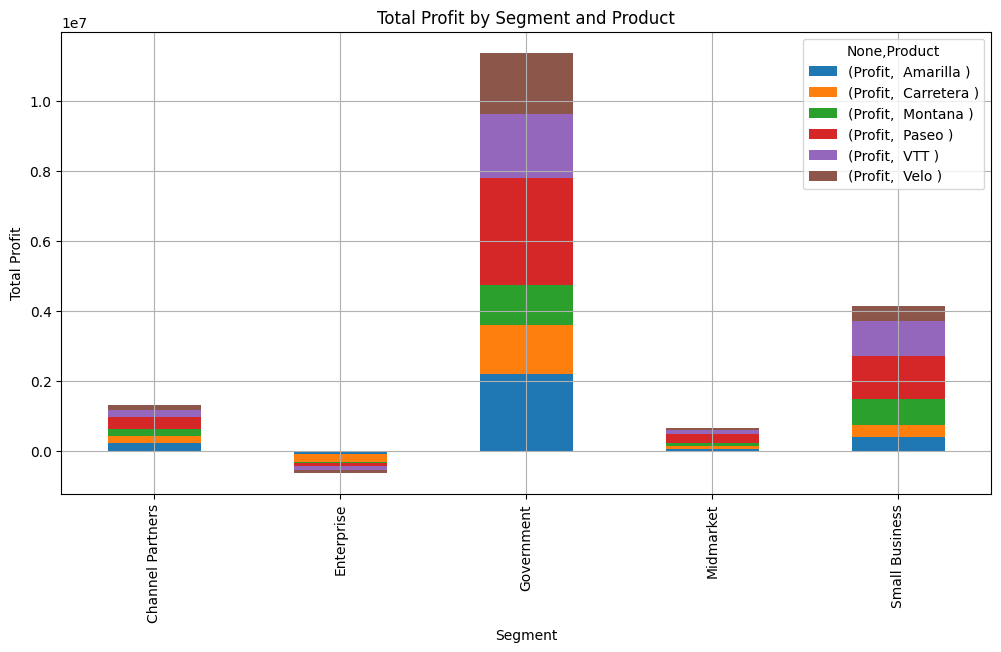

                        COGS
Discount_Band               
High           138708.661224
Low            177755.762500
Medium         137193.838843
None           117116.962264


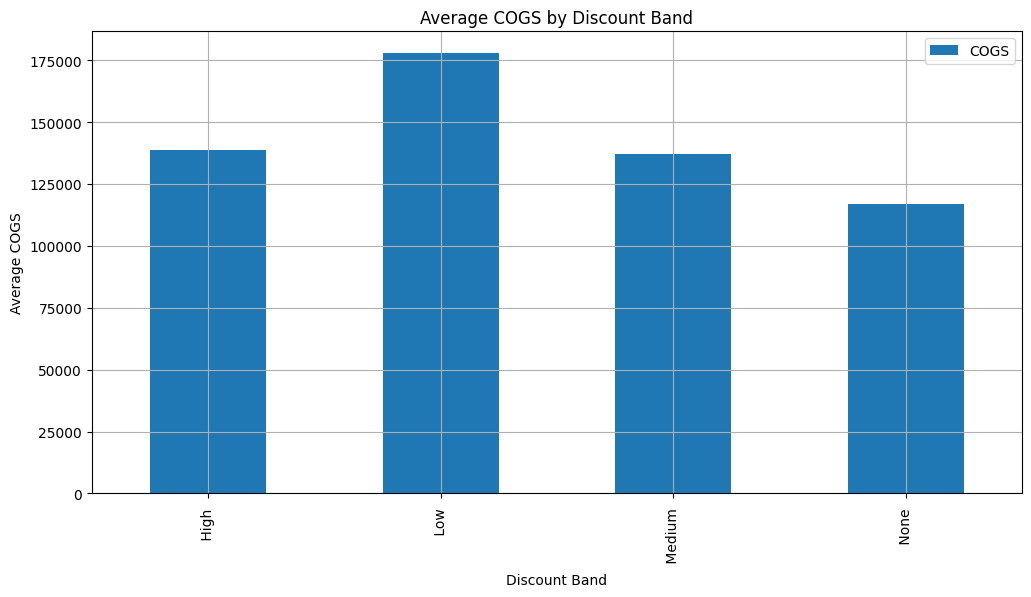

In [29]:
# 36. Calculate and plot average gross sales by country
avg_gross_sales_by_country = df.groupby('Country').agg({'Gross_Sales': 'mean'})
print(avg_gross_sales_by_country)
avg_gross_sales_by_country.plot(kind='bar', figsize=(12, 6))
plt.title('Average Gross Sales by Country')
plt.xlabel('Country')
plt.ylabel('Average Gross Sales')
plt.grid(True)
plt.show()

# 37. Calculate and plot average profit margin by product
avg_profit_margin_by_product = df.groupby('Product').agg({'Profit_Margin': 'mean'})
print(avg_profit_margin_by_product)
avg_profit_margin_by_product.plot(kind='bar', figsize=(12, 6))
plt.title('Average Profit Margin by Product')
plt.xlabel('Product')
plt.ylabel('Average Profit Margin')
plt.grid(True)
plt.show()

# 38. Calculate and plot total sales by product and country
sales_by_product_country = df.groupby(['Product', 'Country']).agg({'Sales': 'sum'}).unstack()
print(sales_by_product_country)
sales_by_product_country.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total Sales by Product and Country')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# 39. Calculate and plot total profit by segment and product
profit_by_segment_product = df.groupby(['Segment', 'Product']).agg({'Profit': 'sum'}).unstack()
print(profit_by_segment_product)
profit_by_segment_product.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total Profit by Segment and Product')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

# 40. Calculate and plot average COGS by discount band
avg_cogs_by_discount_band = df.groupby('Discount_Band').agg({'COGS': 'mean'})
print(avg_cogs_by_discount_band)
avg_cogs_by_discount_band.plot(kind='bar', figsize=(12, 6))
plt.title('Average COGS by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Average COGS')
plt.grid(True)
plt.show()


**SALES AND PERFORMANCE ANALYSIS**

            Discounts
Product              
Amarilla      1290165
Carretera     1122217
Montana       1159032
Paseo         2600524
VTT           1456616
Velo          1576714


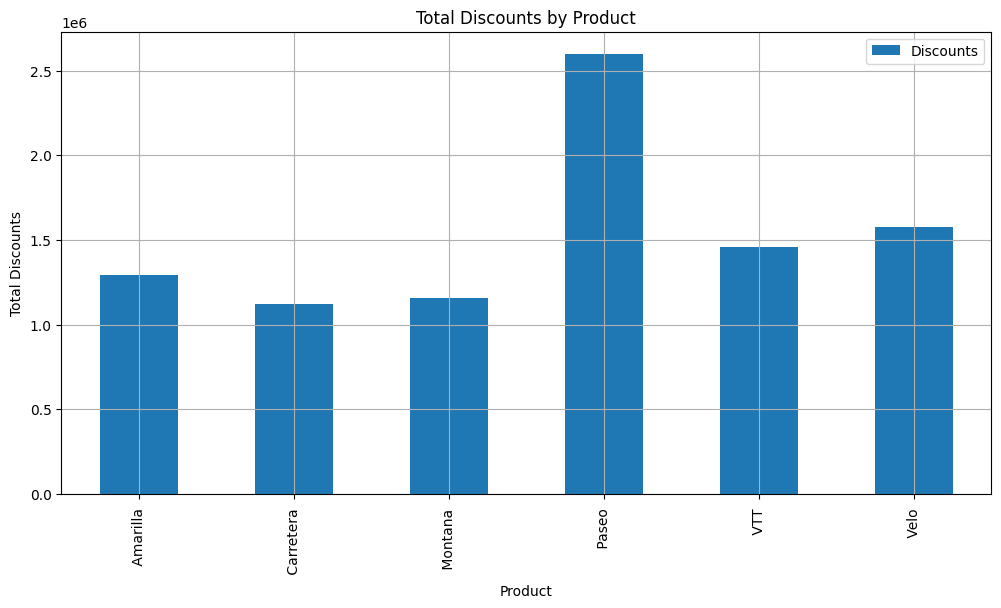

            Sale_Price
Product               
Amarilla    128.680851
Carretera   111.774194
Montana     117.096774
Paseo       108.178218
VTT         138.587156
Velo        115.238532


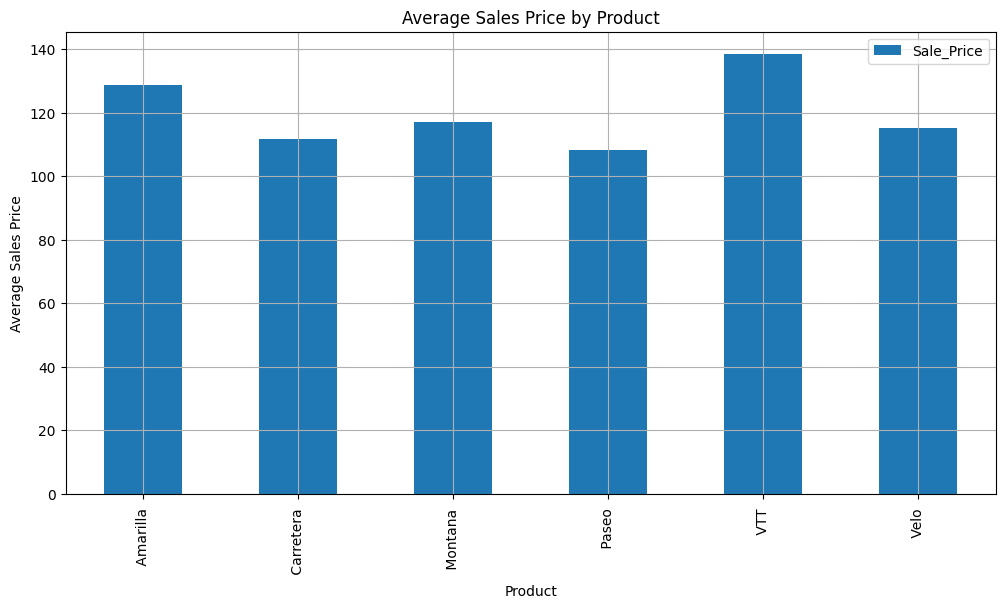

                          Manufacturing_Price
Country                                      
Canada                              93.928571
France                              95.528571
Germany                             95.500000
Mexico                              95.671429
United States of America           101.757143


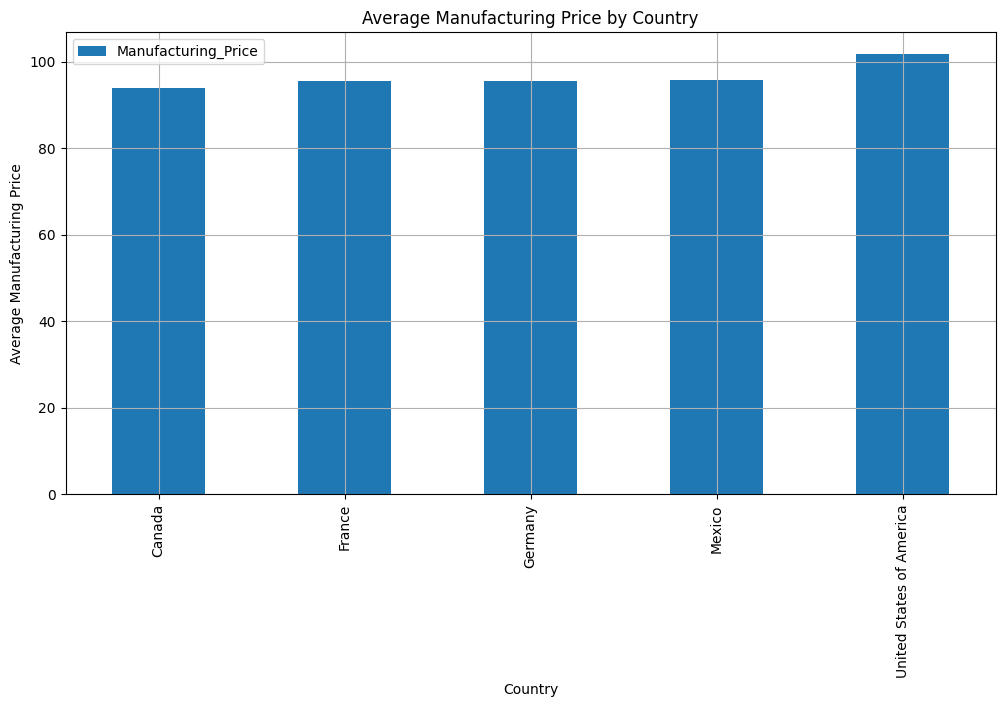

             Profit
Month_Name         
April        929986
August       791064
December    2717339
February    1148546
January      814028
July         923867
June        1473754
March        669871
May          828641
November    1370106
October     3439790
September   1786732


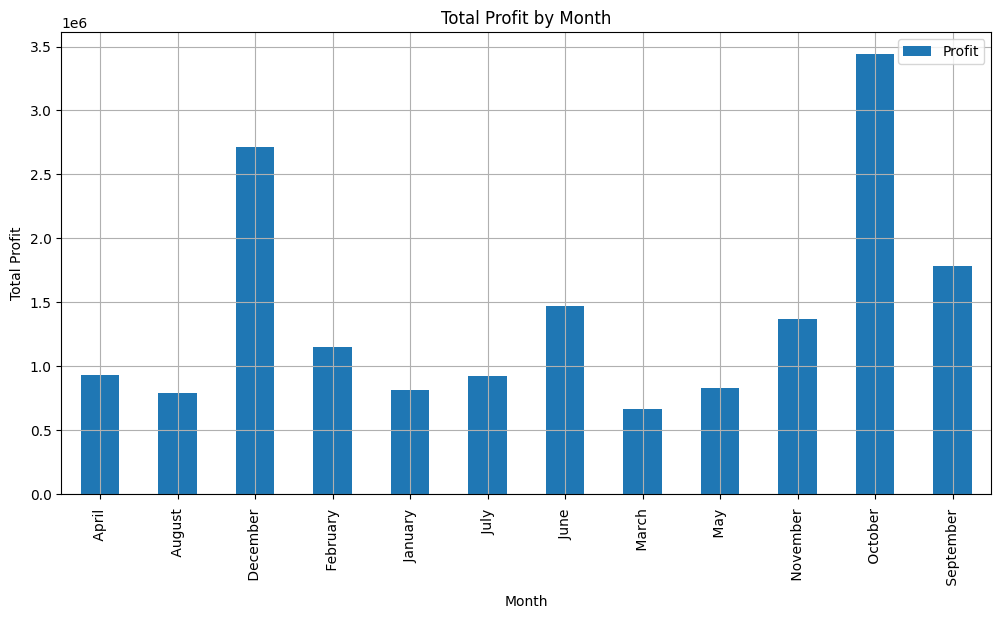

                  Units_Sold
Segment                     
Channel Partners     1612.66
Enterprise           1685.55
Government           1568.94
Midmarket            1721.80
Small Business       1531.41


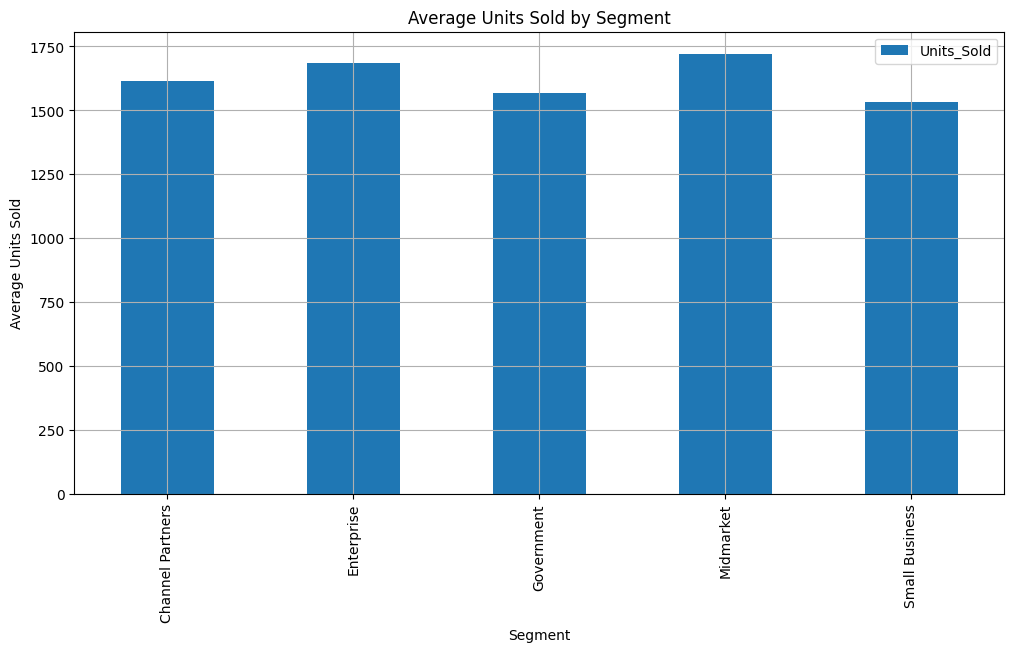

In [30]:
# 41. Calculate and plot total discounts by product
total_discounts_by_product = df.groupby('Product').agg({'Discounts': 'sum'})
print(total_discounts_by_product)
total_discounts_by_product.plot(kind='bar', figsize=(12, 6))
plt.title('Total Discounts by Product')
plt.xlabel('Product')
plt.ylabel('Total Discounts')
plt.grid(True)
plt.show()

# 42. Calculate and plot average sales price by product
avg_sales_price_by_product = df.groupby('Product').agg({'Sale_Price': 'mean'})
print(avg_sales_price_by_product)
avg_sales_price_by_product.plot(kind='bar', figsize=(12, 6))
plt.title('Average Sales Price by Product')
plt.xlabel('Product')
plt.ylabel('Average Sales Price')
plt.grid(True)
plt.show()

# 43. Calculate and plot average manufacturing price by country
avg_manufacturing_price_by_country = df.groupby('Country').agg({'Manufacturing_Price': 'mean'})
print(avg_manufacturing_price_by_country)
avg_manufacturing_price_by_country.plot(kind='bar', figsize=(12, 6))
plt.title('Average Manufacturing Price by Country')
plt.xlabel('Country')
plt.ylabel('Average Manufacturing Price')
plt.grid(True)
plt.show()

# 44. Calculate and plot total profit by month
total_profit_by_month = df.groupby('Month_Name').agg({'Profit': 'sum'})
print(total_profit_by_month)
total_profit_by_month.plot(kind='bar', figsize=(12, 6))
plt.title('Total Profit by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

# 45. Calculate and plot average units sold by segment
avg_units_sold_by_segment = df.groupby('Segment').agg({'Units_Sold': 'mean'})
print(avg_units_sold_by_segment)
avg_units_sold_by_segment.plot(kind='bar', figsize=(12, 6))
plt.title('Average Units Sold by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Units Sold')
plt.grid(True)
plt.show()


**ANNUAL AND LONG TERM ANALYSIS**

         Sales
Year          
2013  26415268
2014  92311117


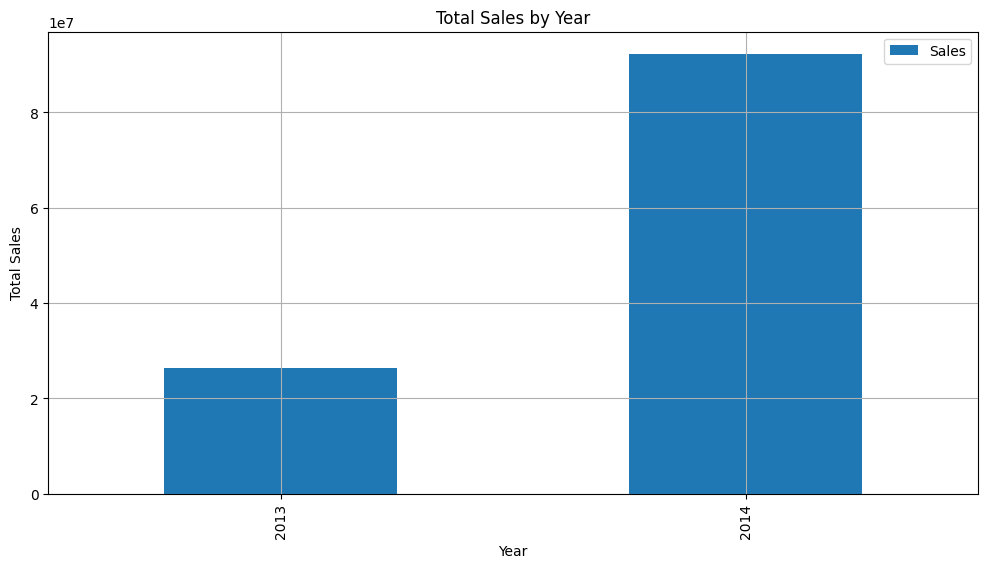

                  Profit
Month_Name              
April       26571.028571
August      22601.828571
December    25879.419048
February    32815.600000
January     23257.942857
July        26396.200000
June        21053.628571
March       19139.171429
May         23675.457143
November    19572.942857
October     24569.928571
September   25524.742857


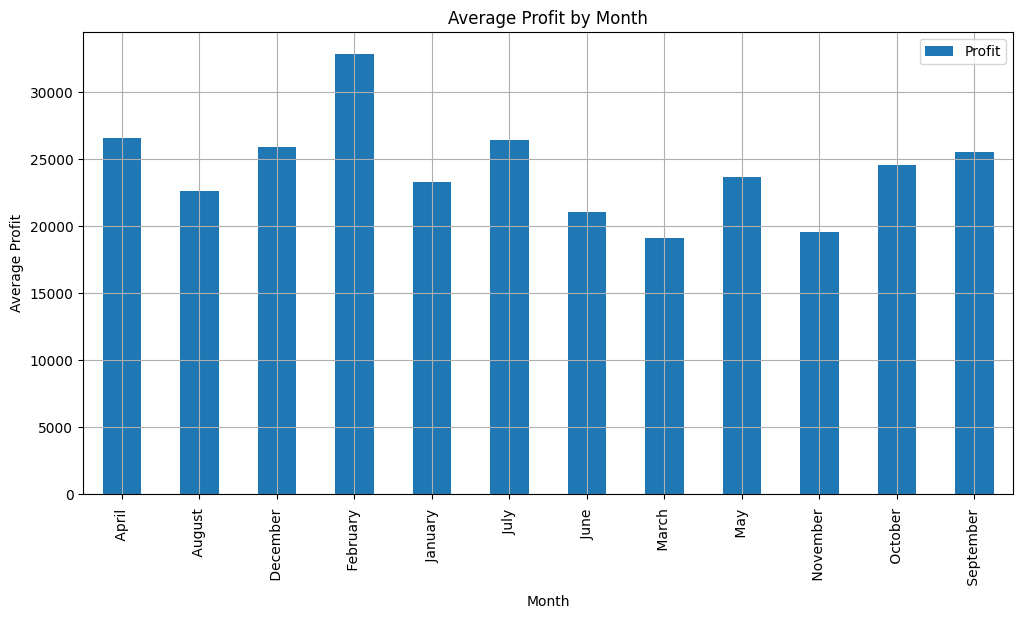

                   Profit         
Year                 2013     2014
Segment                           
Channel Partners   289891  1026912
Enterprise        -193758  -420791
Government        2886648  8501549
Midmarket          151766   508337
Small Business     743924  3399246


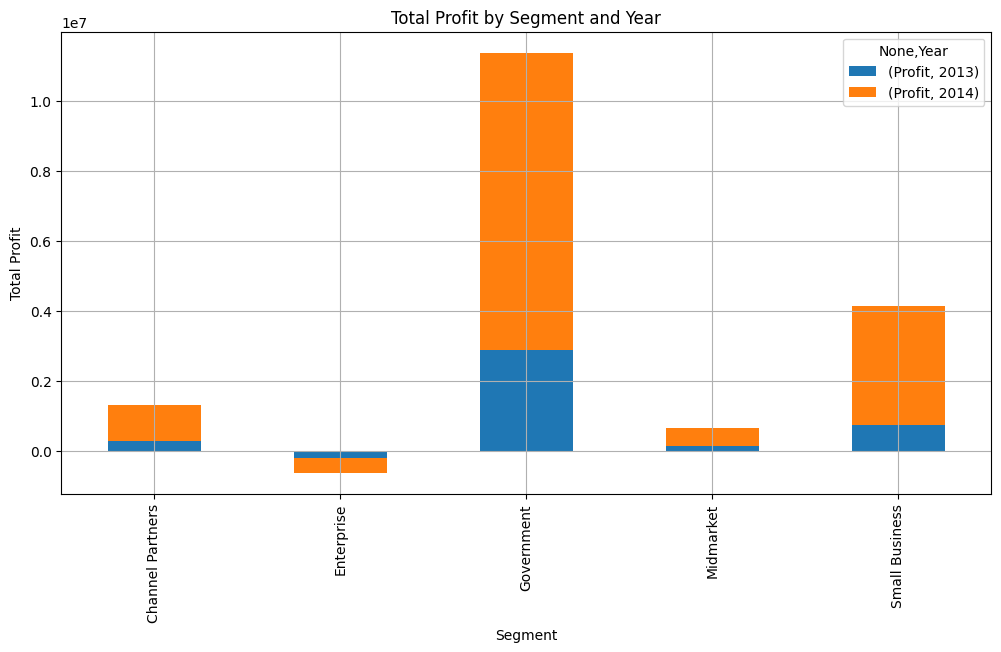

            Discount_Percentage
Month_Name                     
April                  0.069143
August                 0.070576
December               0.068375
February               0.066569
January                0.081144
July                   0.081430
June                   0.057141
March                  0.077706
May                    0.081712
November               0.083712
October                0.078571
September              0.068575


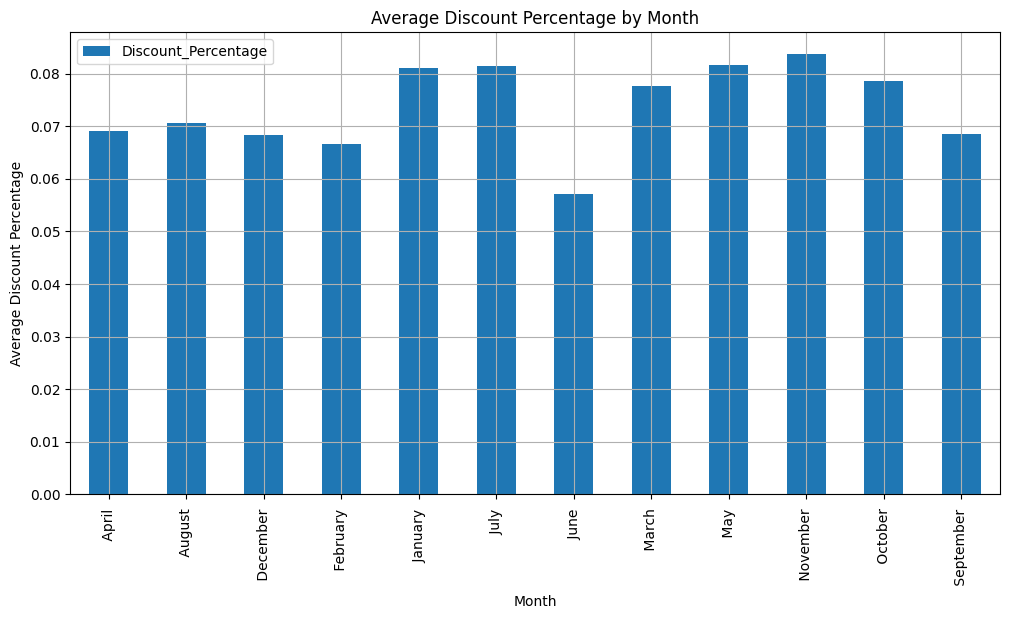

                  Sales                            
Discount_Band     High       Low   Medium     None 
Product                                            
Amarilla        4867429   4333700  6939915  1606074
Carretera       5565164   4604938  2973831   671380
Montana         3850492   4178563  6536191   825561
Paseo          10462799  10687031  9945392  1915931
VTT             6051179   6967248  5597065  1896436
Velo            6575434   3858309  6788050  1028273


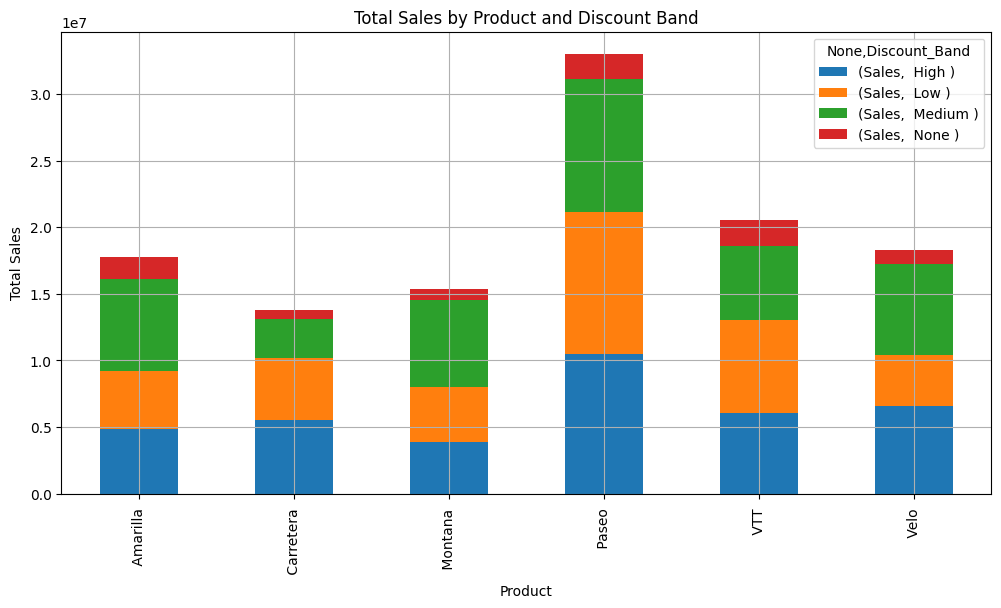

In [31]:
# 46. Calculate and plot total sales by year
total_sales_by_year = df.groupby('Year').agg({'Sales': 'sum'})
print(total_sales_by_year)
total_sales_by_year.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# 47. Calculate and plot average profit by month
avg_profit_by_month = df.groupby('Month_Name').agg({'Profit': 'mean'})
print(avg_profit_by_month)
avg_profit_by_month.plot(kind='bar', figsize=(12, 6))
plt.title('Average Profit by Month')
plt.xlabel('Month')
plt.ylabel('Average Profit')
plt.grid(True)
plt.show()

# 48. Calculate and plot total profit by segment and year
profit_by_segment_year = df.groupby(['Segment', 'Year']).agg({'Profit': 'sum'}).unstack()
print(profit_by_segment_year)
profit_by_segment_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total Profit by Segment and Year')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

# 49. Calculate and plot average discount by month
avg_discount_by_month = df.groupby('Month_Name').agg({'Discount_Percentage': 'mean'})
print(avg_discount_by_month)
avg_discount_by_month.plot(kind='bar', figsize=(12, 6))
plt.title('Average Discount Percentage by Month')
plt.xlabel('Month')
plt.ylabel('Average Discount Percentage')
plt.grid(True)
plt.show()

# 50. Calculate and plot total sales by product and discount band
sales_by_product_discount_band = df.groupby(['Product', 'Discount_Band']).agg({'Sales': 'sum'}).unstack()
print(sales_by_product_discount_band)
sales_by_product_discount_band.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total Sales by Product and Discount Band')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
